# Analysis: Checking Autocorr
Peter Sharpe

Just want to check that my autocorrelation functions are working right.

Imports and data setup:

In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(font_scale=1)


data = pd.read_csv(
    os.path.abspath("../data/sp_500_max.csv"),
    sep=","
)
close = data["Close"].values

daily_change = close[1:] / close[:-1]
daily_change_pct = (daily_change - 1) * 100

### Autocorrelation

"How much does the stock market performance today correlate with the stock market performance $x$ days from now?"

If nonzero; this implies predictive power.

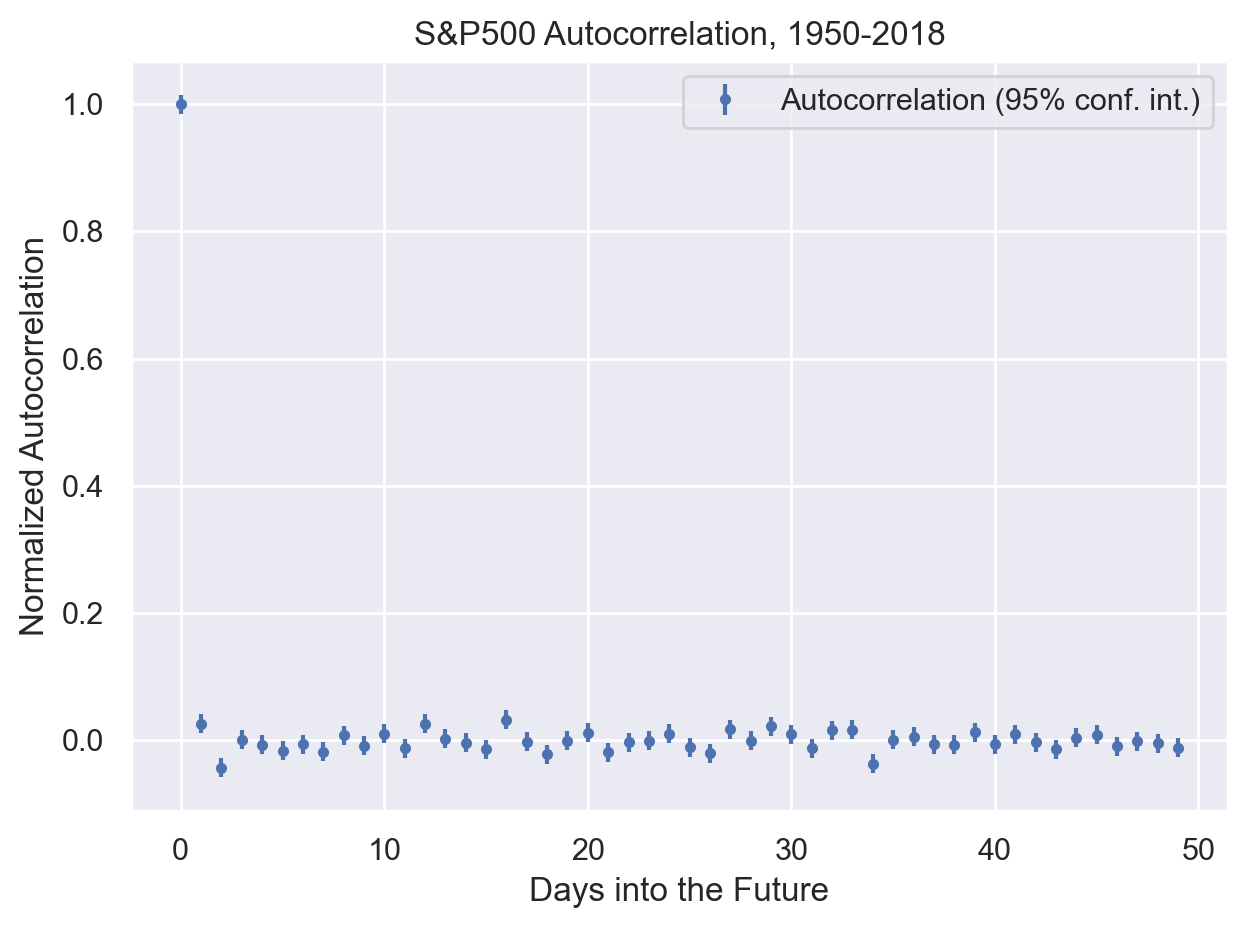

In [67]:
forecast_max_days = 50

# def autocorr(x):
#     r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
#     c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
#     return c[:len(x)//2][:forecast_max_days+1]

def autocorr(x):
    variance = np.var(x)
    x -= np.mean(x)
    autocorrs = []
    for lag in np.arange(forecast_max_days):
        overlap = x*x if lag == 0 else x[lag:]*x[:-lag]
        autocorrs.append(
            np.mean(overlap) / variance
        )
    return autocorrs

autocorr_data=autocorr(daily_change_pct)
# autocorr_data=autocorr(close)

autocorr_x=np.arange(len(autocorr_data))

def make_autocorr():
    fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
    plt.errorbar(
        x=autocorr_x,
        y=autocorr_data,
        yerr = 1.96/np.sqrt(len(daily_change_pct)),
        fmt=".",
        label="Autocorrelation (95% conf. int.)"
    )

def show_autocorr():
    plt.xlabel(r"Days into the Future")
    plt.ylabel(r"Normalized Autocorrelation")
    plt.title(r"S&P500 Autocorrelation, 1950-2018")
    plt.tight_layout()
    plt.legend()
    # plt.savefig("C:/Users/User/Downloads/temp.svg")
    plt.show()

make_autocorr()
show_autocorr()